< 회귀 및 선형회귀 >
p.308
### 회귀계수(Regression coefficients) : 독립변수의 값에 영향
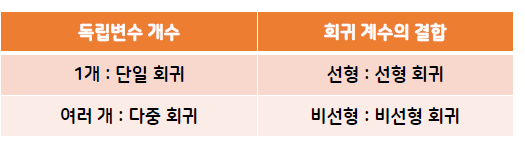
#### 회귀 분석 : 시간에 따라 변화하는 데이터나 영향, 가설적 실험, 인과 관계 모델링 등에서 많이 사용. 종속 변수(목표)와 하나 이상의 독립변수(예측변수) 간 미래 사건을 예측하는 방법.
### 수치적 가치를 추정

- 연속 숫자를 포함하는 머신러닝 문제 해결에 필수적, 딥 러닝 이론의 기초
- 선형 모델 (Linear Model) : 입력 특성에 대한 선형함수를 만들어 예측을 수행
- 다양한 선형 모델이 존재 (= 선을 그을 수 있는 방법이 다양하다.)
- 분류와 회귀에 모두 사용가능
- 기본식) 문제가 1개일때: y= wx +b
- 문제가 p개일때 : y = w1x1 + w2x2 + ...+ wpxp + b
- w : 가중치( 각 문제마다 다른 가중치가 적용됨 ) , b: 편향

### 선형회귀 이해하기.
- 성적데이터를 기반으로 선형회귀를 이해해보자.

In [15]:
# 성적 데이터 생성을 위한 라이브러리 꺼내오기
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# 성적 데이터 생성
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
            index=['준화','철수','유리','민수'],
             columns=['시간','성적'])
data

,시간,성적
준화,2,20
철수,4,40
유리,8,80
민수,9,90


### MSE가 최소가 되는 최적의 w,b를 찾는 방법
- MSE : 평균제곱오차(Mean Squared Error) ➜  비용함수(cost)
-  1. 수학 공식을 이용한 해석적 모델
-  2. 경사하강법(XGBoost에서 오차 계산하는 방법)

### 1. 수학 공식을 이용한 해석적 모델
- LinearRegression 
- 공식을 이용해서 적은 계산으로 한번에 최적의 선형함수를 찾는 방법
- 공식이 완벽하지 않을 경우, 값을 못 찾을 수도 있고 
- 공식이 잘못되었을 경우 고칠 수 없다는 문제가 있음. ➜ 추후 규제를 접목 개선

In [17]:
from sklearn.linear_model import LinearRegression

# 모델 생성 및 하이퍼파라미터 설정
linear_model = LinearRegression() 

# 학습
linear_model.fit(data[['시간']],data['성적']) # 문제는 2차원, 정답은 1차원

LinearRegression()

#### y = wx + b ( 1개의 문제 )

In [18]:
# 기울기, 가중치 출력
print('기울기, 가중치: ', linear_model.coef_)

# 절편, 편향 출력
print('절편, 편향: ', linear_model.intercept_)

기울기, 가중치:  [10.]
절편, 편향:  7.105427357601002e-15


In [19]:
# 예측
# 영재씨가 7시간 공부했을 때. 몇 점?
linear_model.predict([[7]])

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

## 가설함수
### - H(x)

### 함수 정의

In [20]:
def h(w,x):
    return w*x + 0

### 비용함수(Cost Function)
## 비용 =오차
### ( 비용 함수 정의)
#### - data: 문제 값
#### - target : 정답(실제값)
#### - weight : 가중치

In [23]:
def cost(data, target, weight):
    #예측
    y_pre= h(weight,data)
    
    # 평균 제곱 오차 
    # : ((예측값 - 실제값)^2).mean()
    error = ((y_pre- target)**2).mean()
    return error    

In [24]:
# 가중치에 따른 오차값 확인
cost(data['시간'],data['성적'],8)

165.0

In [25]:
cost(data['시간'],data['성적'],10)

0.0

In [28]:
# 가중치 변화에 따른 비용함수의 변화를 그래프로 확인
cost_list =[]

for w in range(5,16): # 5 ~ 15까지 가중치 변화
    err=cost(data['시간'],data['성적'],w)
    cost_list.append(err)
cost_list

[1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25]

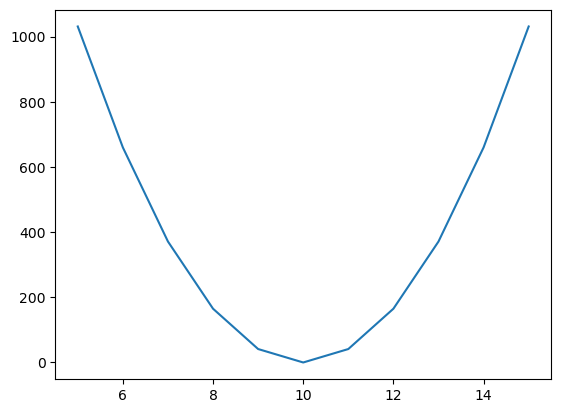

In [29]:
# 비용함수(MSE) 그리기
plt.plot(range(5,16), cost_list) 
plt.show()

linear_model.score([data.[['시간']],data[['성적']]])
# 분류모델: score ~ 정확도
#회귀모델 : score(MSE를 기반으로한 R2score)-유사도


- 경사 하강법
- SGDRegressor
- 점진적으로 오차가 작은 선형 함수를 찾아가는 방법
- 오차를 수정하는 방향으로 그래프를 다시 그려줌.
- 선형함수를 잘못 찾았을 경우 수정이 가능
- 점진적으로 찾아가므로 계산량이 많아서 시간이 오래 걸림.
- 학습율(learning rate)
    - 너무 크게 설정하면 오차가 커짐(발산)
    - 너무 작게 설정하면 국소 지역점에 빠져서 최적의 해를 찾지 못함.

In [33]:
from sklearn.linear_model import SGDRegressor

#모델 생성 및 하이퍼 파라미터 설정
    
sgd_model = SGDRegressor(max_iter=5000, # 가중치 업데이트
                          eta0=0.001,  # 학습률(learning rate)
                          verbose =1) 
 
#학습
sgd_model.fit(data[['시간']],data['성적'])


-- Epoch 1
Norm: 1.30, NNZs: 1, Bias: 0.182310, T: 4, Avg. loss: 1887.421789
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.19, NNZs: 1, Bias: 0.303737, T: 8, Avg. loss: 1453.118357
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.87, NNZs: 1, Bias: 0.399560, T: 12, Avg. loss: 1177.732583
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.45, NNZs: 1, Bias: 0.480734, T: 16, Avg. loss: 980.737327
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.96, NNZs: 1, Bias: 0.550448, T: 20, Avg. loss: 825.042755
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.40, NNZs: 1, Bias: 0.611714, T: 24, Avg. loss: 700.871474
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.79, NNZs: 1, Bias: 0.666182, T: 28, Avg. loss: 600.980674
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.14, NNZs: 1, Bias: 0.714781, T: 32, Avg. loss: 517.708696
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.46, NNZs: 1, Bias: 0.758780, T: 36, Avg. loss: 448.161647
Total training time: 0.00 

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [34]:
# 예측
sgd_model.predict([[7]])

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88177928])

In [35]:
# 가중치(w), 편향(b) 확인하기
print(sgd_model.coef_)
print(sgd_model.intercept_)

[9.79290234]
[1.33146292]


In [36]:
sgd_model.score(data[['시간']],data['성적'])
# 1에 가까울수록 모델이 예측 성능이 높다고 판단.

0.9995469433774614